In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
df=pd.read_csv('/content/predicted_Sentiments.csv')#,parse_dates=['DateFrom'],date_parser=d_parser)
df.head(2)


,Date,Content,Rating,Version,sentiment_labels,Rating_converted,check
0,12/31/2021,isnt updating g new version even though ticked...,2,6.1.0,NEGATIVE,NEGATIVE,True
1,12/31/2021,getting message unfortunately nz covid tracer ...,1,6.1.0,NEGATIVE,NEGATIVE,True


In [3]:
df1 = df[['Date','sentiment_labels']]
df1.tail(10)


,Date,sentiment_labels
4089,7/30/2020,NEGATIVE
4090,7/30/2020,POSITIVE
4091,7/30/2020,NEGATIVE
4092,7/29/2020,NEGATIVE
4093,7/24/2020,NEGATIVE
4094,7/21/2020,POSITIVE
4095,7/20/2020,POSITIVE
4096,7/16/2020,NEGATIVE
4097,7/15/2020,POSITIVE
4098,7/15/2020,NEGATIVE


In [4]:
df1.shape

(4099, 2)

In [5]:
df1["Date"] = pd.to_datetime(df1["Date"])
df1 = df1.sort_values(by="Date")
df1.head(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,sentiment_labels
4098,2020-07-15,NEGATIVE
4097,2020-07-15,POSITIVE
4096,2020-07-16,NEGATIVE
4095,2020-07-20,POSITIVE
4094,2020-07-21,POSITIVE
3548,2020-07-22,NEGATIVE
3547,2020-07-23,NEGATIVE
3546,2020-07-23,NEGATIVE
4093,2020-07-24,NEGATIVE
3540,2020-07-24,NEGATIVE


In [6]:
df1.shape

(4099, 2)

In [7]:
df2 = pd.get_dummies(df1.sentiment_labels)
df2

,NEGATIVE,NEUTRAL,POSITIVE
4098,1,0,0
4097,0,0,1
4096,1,0,0
4095,0,0,1
4094,0,0,1
...,...,...,...
0,1,0,0
3552,0,0,1
3551,0,0,1
3549,1,0,0


In [8]:
data = pd.concat([df1, df2], axis=1, join="inner")
data

,Date,sentiment_labels,NEGATIVE,NEUTRAL,POSITIVE
4098,2020-07-15,NEGATIVE,1,0,0
4097,2020-07-15,POSITIVE,0,0,1
4096,2020-07-16,NEGATIVE,1,0,0
4095,2020-07-20,POSITIVE,0,0,1
4094,2020-07-21,POSITIVE,0,0,1
...,...,...,...,...,...
0,2021-12-31,NEGATIVE,1,0,0
3552,2022-01-06,POSITIVE,0,0,1
3551,2022-01-07,POSITIVE,0,0,1
3549,2022-01-09,NEGATIVE,1,0,0


In [9]:
data_grouped = data.groupby([pd.Grouper(key='Date', freq='W')]).sum()
data_grouped

,NEGATIVE,NEUTRAL,POSITIVE
Date,,,
2020-07-19,2.0,0.0,1.0
2020-07-26,9.0,0.0,3.0
2020-08-02,31.0,0.0,14.0
2020-08-09,36.0,0.0,10.0
2020-08-16,644.0,16.0,160.0
...,...,...,...
2021-12-12,11.0,0.0,11.0
2021-12-19,14.0,0.0,12.0
2021-12-26,9.0,2.0,10.0


In [10]:
data_grouped.to_csv('/content/data_grouped_RF.csv')


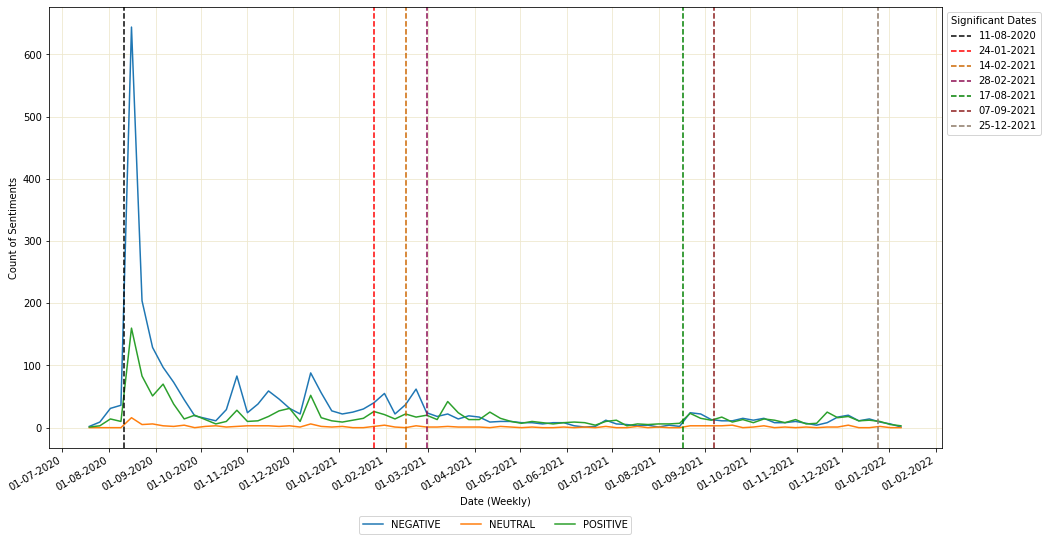

In [11]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
# data['Date'] = pd.to_datetime(df1['Date/Time To(New)'])
ax = plt.figure(figsize=(16,9))

ax = plt.plot(data_grouped[['NEGATIVE','NEUTRAL','POSITIVE']])
ax = plt.gca()
plt.xlabel("Date (Weekly)")
plt.ylabel("Count of Sentiments")

# Define the date format
date_form = DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
ax = plt.gcf().autofmt_xdate()

#vertical lines for significant events
plt.axvline(pd.Timestamp('2020-08-11'),color='#050505',linestyle='--', label='11-08-2020')
plt.axvline(pd.Timestamp('2021-01-24'),color='r',linestyle='--', label='24-01-2021')
plt.axvline(pd.Timestamp('2021-02-14'),color='#CD6600',linestyle='--', label='14-02-2021')
plt.axvline(pd.Timestamp('2021-02-28'),color='#8B0A50',linestyle='--', label='28-02-2021')
plt.axvline(pd.Timestamp('2021-08-17'),color='g',linestyle='--', label='17-08-2021')
plt.axvline(pd.Timestamp('2021-09-07'),color='#8B1A1A',linestyle='--', label='07-09-2021')
plt.axvline(pd.Timestamp('2021-12-25'),color='#8B7765',linestyle='--', label='25-12-2021')

#grid color
plt.grid(b=True,color='#EEE8CD')

#legend
first_legend = plt.legend(['NEGATIVE','NEUTRAL','POSITIVE'], 
                          loc='center',ncol=3,bbox_to_anchor=(0.5, -0.175))
plt.gca().add_artist(first_legend)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',title = "Significant Dates")

plt.show()